# 1D CNNs with SMOTE

In [46]:
# enable auto-reloading submodules
%reload_ext autoreload
%autoreload 2

# hidpi plots for retina displays
%config InlineBackend.figure_format = 'retina'

from trainer import Trainer

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Activation, Flatten
from keras.callbacks import EarlyStopping

## Shared Parameters

In [47]:
# DRIAMS sites and years
sites = ['A']
years = [2015, 2016, 2017, 2018]
# list of callbacks to apply during training
cnn_callbacks = [
    EarlyStopping(monitor='binary_accuracy', patience=20, verbose=0),
]

## 1D CNN Model

In [48]:
def build_cnn_1d():
    kernel_size = 60
    # 1D CNN model based on <https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_34class/5cv_1D_CNN_34class.py>
    model = Sequential()
    ## *********** First layer Conv
    model.add(Conv1D(
        filters=32,
        kernel_size=kernel_size,
        strides=kernel_size, # stride == kernel length
        input_shape=(6000, 1),
    ))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2, padding='same'))
    ## ********* Classification layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['binary_accuracy'],
    )

    return model

## E. Coli

In [49]:
ecoli_trainer = Trainer(
    pathogen='Escherichia coli',
    n_splits=5,
    sites=sites,
    years=years,
)

ecoli_drugs = [
    'Ceftriaxone',
    'Ciprofloxacin',
    'Cefepime',
    'Piperacillin-Tazobactam',
    'Tobramycin',
]

for drug in ecoli_drugs:
    ecoli_trainer.fit(
        drug=drug,
        model=build_cnn_1d(),
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
ecoli_results = ecoli_trainer.collect_results()
ecoli_results.save_to('./results/1d_cnn/ecoli')

Loading Ceftriaxone...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://c0d711f6-f4a3-4315-bc8d-ea28f07bb575/assets


INFO:tensorflow:Assets written to: ram://c0d711f6-f4a3-4315-bc8d-ea28f07bb575/assets


Fold 1/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.78125, f1=0.0
Fold 2/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7649769585253456, ACC=0.8790322580645161, f1=0.6703296703296703
Fold 3/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.8071889400921659, ACC=0.875, f1=0.7061611374407583
Fold 4/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7966820276497696, ACC=0.8870967741935484, f1=0.711340206185567
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.8581566820276496, ACC=0.9002016129032258, f1=0.7744874715261958
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://785bdf62-5640-437b-b22e-659825a44b57/assets


INFO:tensorflow:Assets written to: ram://785bdf62-5640-437b-b22e-659825a44b57/assets


Fold 1/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.8055299539170506, ACC=0.8568548387096774, f1=0.6858407079646017
Fold 2/5...
31/31 [==============================] - 0s 4ms/step
AUC=0.7808294930875574, ACC=0.8830645161290323, f1=0.6914893617021276
Fold 3/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.8658064516129031, ACC=0.8991935483870968, f1=0.7777777777777777
Fold 4/5...
31/31 [==============================] - 0s 4ms/step
AUC=0.9126267281105991, ACC=0.9516129032258065, f1=0.8840579710144928
Fold 5/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.9455299539170506, ACC=0.9304435483870968, f1=0.859470468431772
Loading Ciprofloxacin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://f4c88e87-8c45-424e-923f-83d6209e5cc1/assets


INFO:tensorflow:Assets written to: ram://f4c88e87-8c45-424e-923f-83d6209e5cc1/assets


Fold 1/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.7147302904564315, f1=0.0
Fold 2/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.6633887046708973, ACC=0.7715472481827622, f1=0.506726457399103
Fold 3/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7174499168370535, ACC=0.7954309449636553, f1=0.5987780040733197
Fold 4/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7403197270984077, ACC=0.8265835929387332, f1=0.6393088552915767
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7798035871304017, ACC=0.8390446521287642, f1=0.6942800788954635
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://1aabaa48-cbb9-491d-b347-3e8a75dd0386/assets


INFO:tensorflow:Assets written to: ram://1aabaa48-cbb9-491d-b347-3e8a75dd0386/assets


Fold 1/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7641535822667898, ACC=0.8049792531120332, f1=0.6618705035971223
Fold 2/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.763965548292776, ACC=0.7975077881619937, f1=0.6584938704028022
Fold 3/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7591320330956746, ACC=0.8078920041536864, f1=0.6567717996289425
Fold 4/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7820442193806745, ACC=0.8328141225337488, f1=0.6933333333333332
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.7844252222092739, ACC=0.8598130841121495, f1=0.7121535181236673
Loading Cefepime...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://41f915eb-45b2-4680-8fad-92a8b7b90769/assets


INFO:tensorflow:Assets written to: ram://41f915eb-45b2-4680-8fad-92a8b7b90769/assets


Fold 1/5...
28/28 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.9236902050113895, f1=0.0
Fold 2/5...
28/28 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9236031927023945, f1=0.0
Fold 3/5...
28/28 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.9236031927023945, f1=0.0
Fold 4/5...
28/28 [==============================] - 0s 7ms/step
AUC=0.6599133959830477, ACC=0.928164196123147, f1=0.4220183486238532
Fold 5/5...
28/28 [==============================] - 0s 2ms/step
AUC=0.7450893679749402, ACC=0.9464082098061574, f1=0.591304347826087
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://31ce231b-df5a-4bbb-b32e-3867d0ca8279/assets


INFO:tensorflow:Assets written to: ram://31ce231b-df5a-4bbb-b32e-3867d0ca8279/assets


Fold 1/5...
28/28 [==============================] - 0s 3ms/step
AUC=0.7745918987062224, ACC=0.8997722095671982, f1=0.4883720930232559
Fold 2/5...
28/28 [==============================] - 0s 2ms/step
AUC=0.7887414777962042, ACC=0.9258836944127709, f1=0.563758389261745
Fold 3/5...
28/28 [==============================] - 0s 3ms/step
AUC=0.8615164916159941, ACC=0.9338654503990877, f1=0.6419753086419754
Fold 4/5...
28/28 [==============================] - 0s 2ms/step
AUC=0.8844112769485902, ACC=0.9635119726339795, f1=0.7681159420289855
Fold 5/5...
28/28 [==============================] - 0s 14ms/step
AUC=0.8877740925004606, ACC=0.9064994298745724, f1=0.5858585858585859
Loading Piperacillin-Tazobactam...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://a67d70ac-e059-4ce6-87a7-633f9d20adf8/assets


INFO:tensorflow:Assets written to: ram://a67d70ac-e059-4ce6-87a7-633f9d20adf8/assets


Fold 1/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.935856992639327, f1=0.0
Fold 2/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.935856992639327, f1=0.0
Fold 3/5...
30/30 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.935856992639327, f1=0.0
Fold 4/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.935856992639327, f1=0.0
Fold 5/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.9348054679284963, f1=0.0
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://7c713af0-c57b-4e6b-8369-3b2ebcf6bd28/assets


INFO:tensorflow:Assets written to: ram://7c713af0-c57b-4e6b-8369-3b2ebcf6bd28/assets


Fold 1/5...
30/30 [==============================] - 0s 2ms/step
AUC=0.6351538036470805, ACC=0.8601472134595163, f1=0.2569832402234637
Fold 2/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.6090071836433967, ACC=0.8969505783385909, f1=0.25757575757575757
Fold 3/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.7236599742125621, ACC=0.9400630914826499, f1=0.5043478260869565
Fold 4/5...
30/30 [==============================] - 0s 3ms/step
AUC=0.7970989132436913, ACC=0.9631966351209253, f1=0.6788990825688073
Fold 5/5...
30/30 [==============================] - 0s 2ms/step
AUC=0.966054646395007, ACC=0.9926393270241851, f1=0.943089430894309
Loading Tobramycin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://c97fc293-0ce4-4fe9-9639-9b8002229231/assets


INFO:tensorflow:Assets written to: ram://c97fc293-0ce4-4fe9-9639-9b8002229231/assets


Fold 1/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.8751289989680082, f1=0.0
Fold 2/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.8751289989680082, f1=0.0
Fold 3/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.8751289989680082, f1=0.0
Fold 4/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.8751289989680082, f1=0.0
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.542374213836478, ACC=0.868801652892562, f1=0.16993464052287582
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://b650ab1f-eeae-48a1-97ca-2ce8d5fa9a49/assets


INFO:tensorflow:Assets written to: ram://b650ab1f-eeae-48a1-97ca-2ce8d5fa9a49/assets


Fold 1/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.6412268049274911, ACC=0.7316821465428277, f1=0.3264248704663213
Fold 2/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.6836357788866366, ACC=0.8617131062951496, f1=0.4462809917355372
Fold 3/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7078297988460939, ACC=0.8792569659442725, f1=0.4978540772532189
Fold 4/5...
31/31 [==============================] - 0s 3ms/step
AUC=0.7987193980976143, ACC=0.9267285861713106, f1=0.6816143497757847
Fold 5/5...
31/31 [==============================] - 0s 2ms/step
AUC=0.8965408805031446, ACC=0.9566115702479339, f1=0.8235294117647058


### Bar Graph (E. Coli)

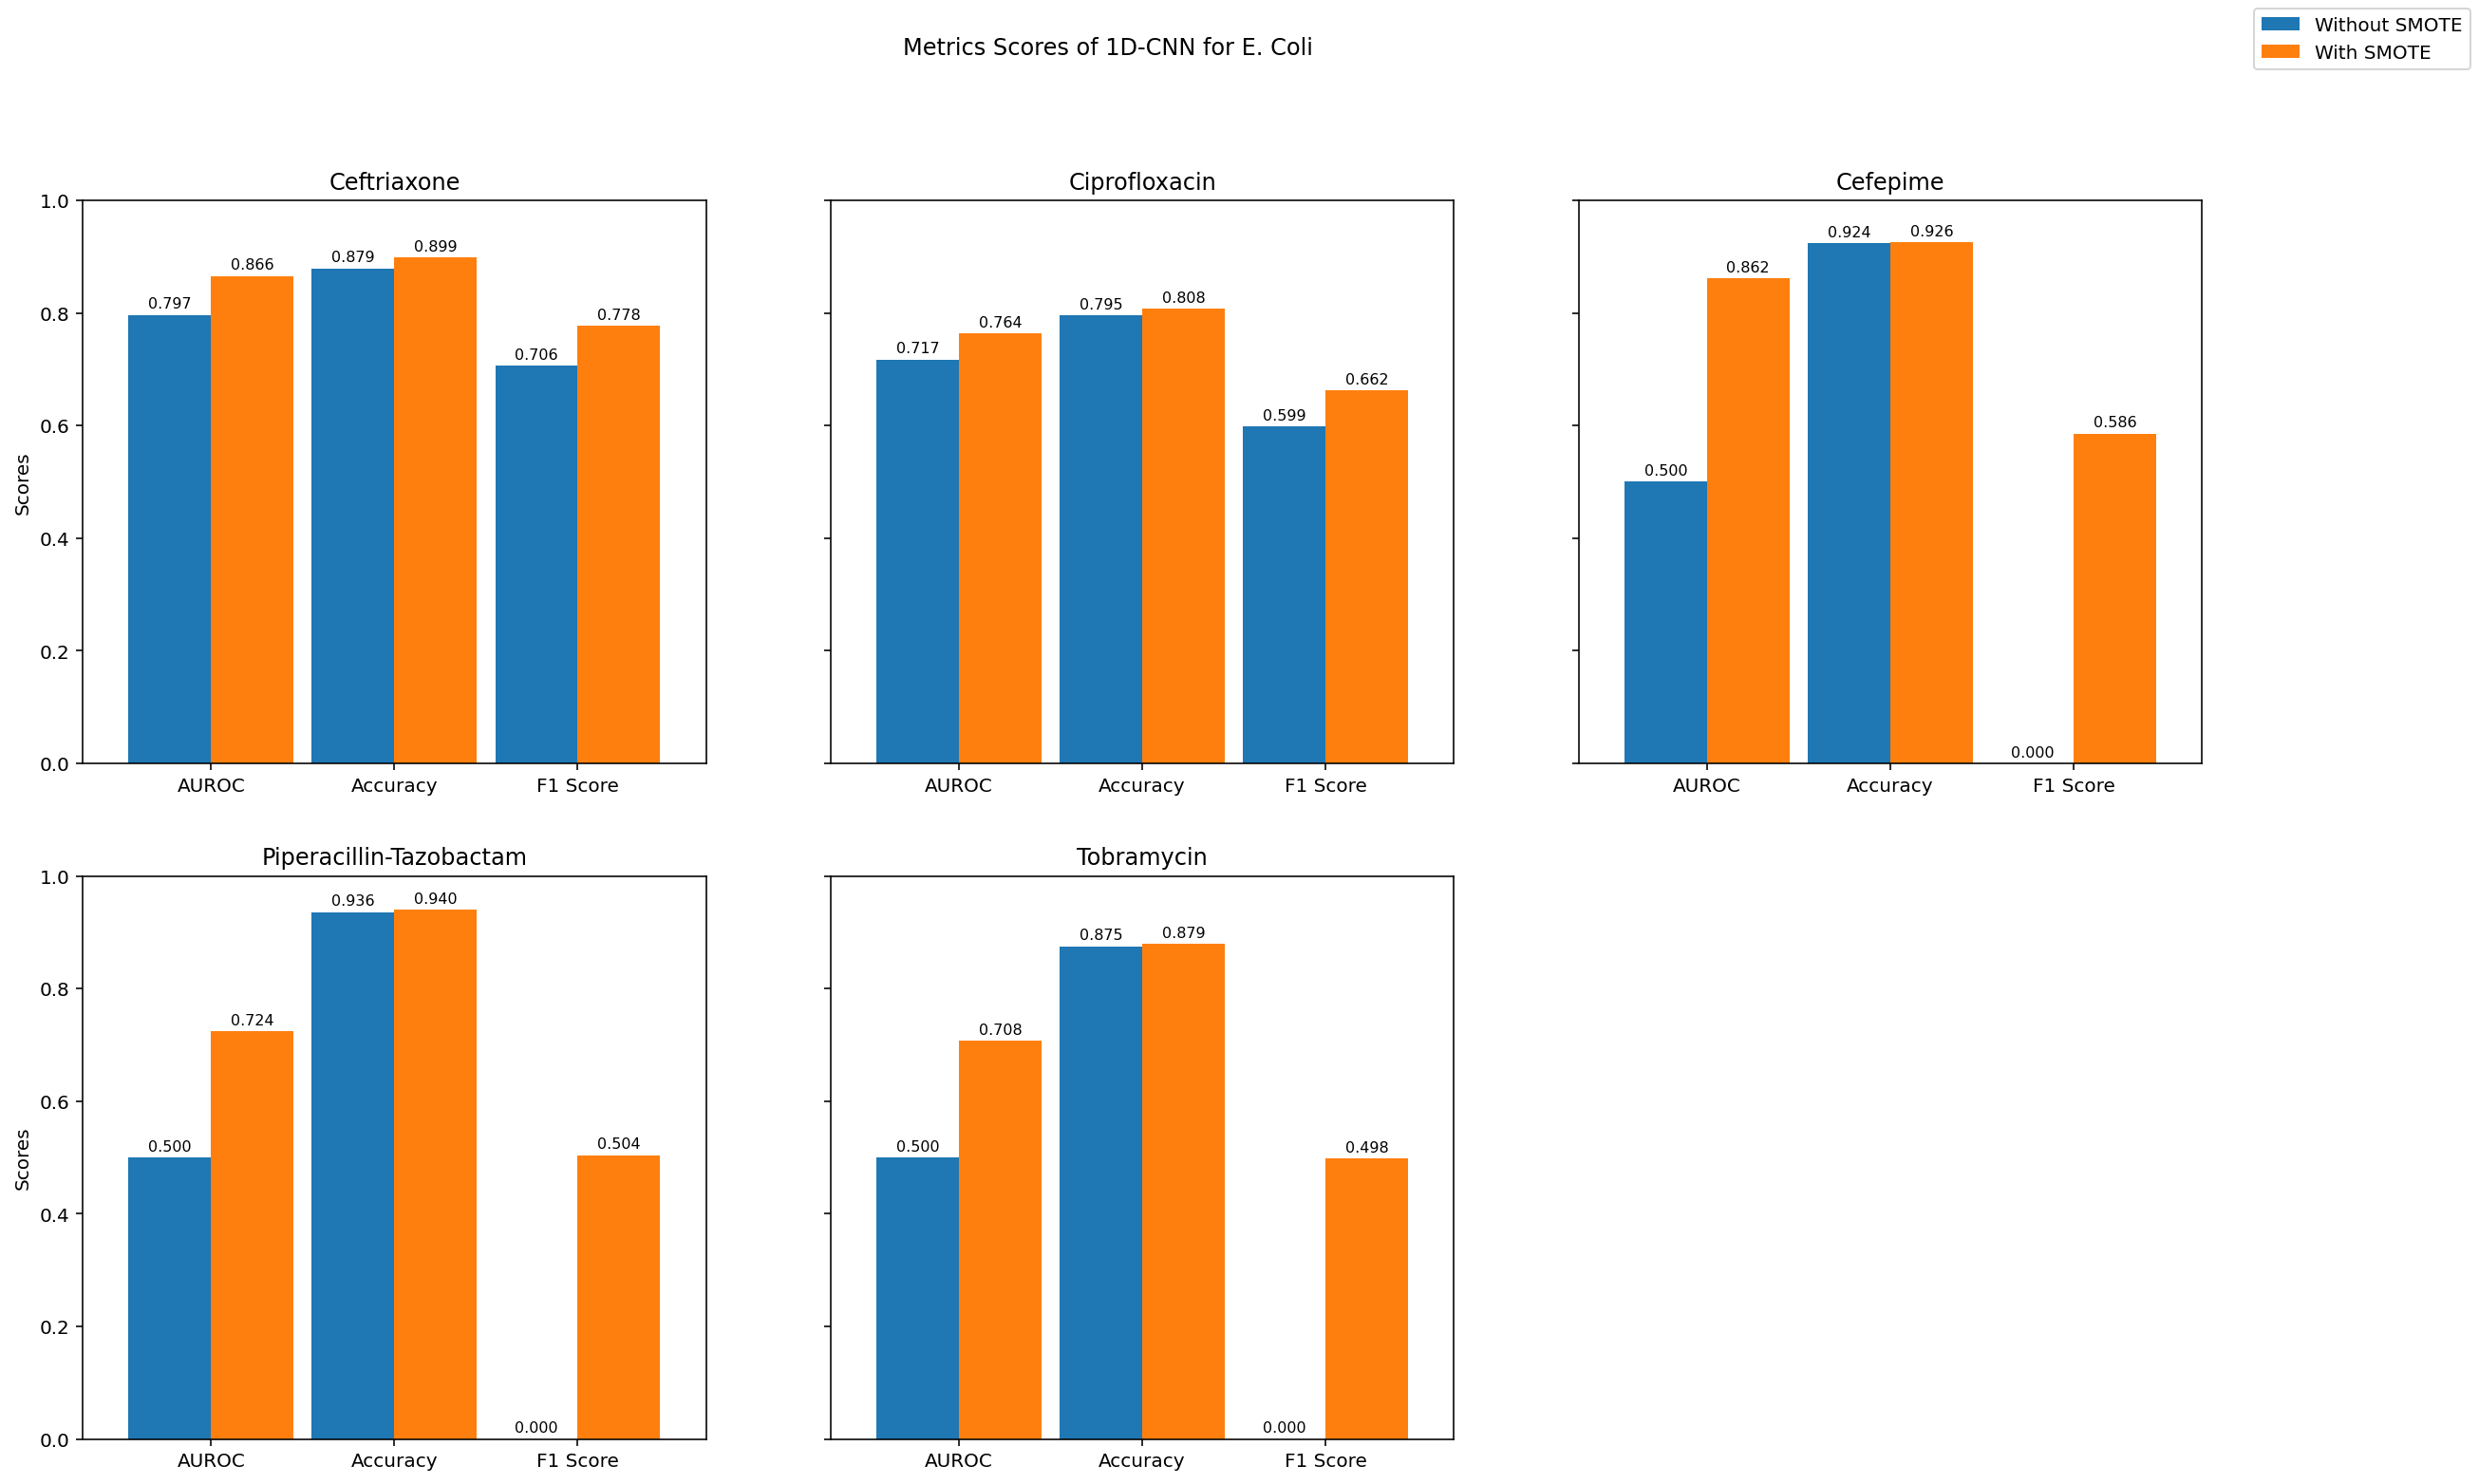

In [50]:
ecoli_results.bar_plot(
    title='Metrics Scores of 1D-CNN for E. Coli',
    save_as='./results/1d_cnn/ecoli/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (E. Coli)

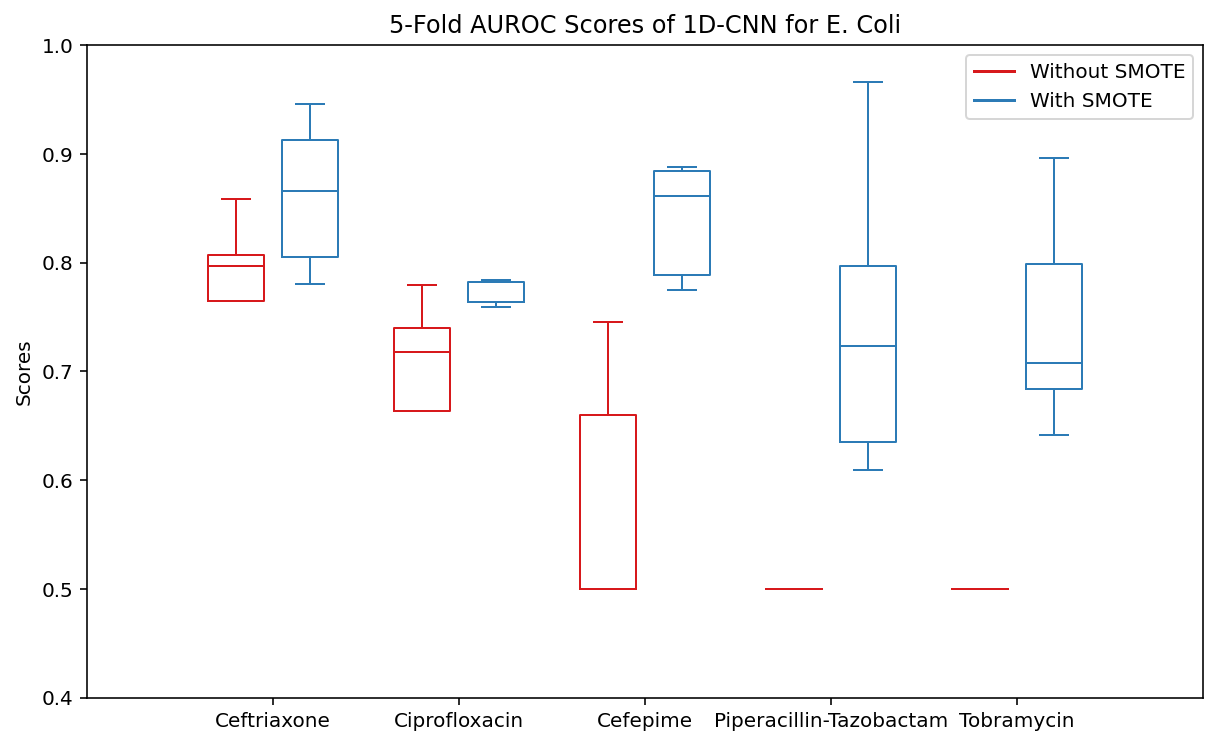

In [51]:
ecoli_results.box_plot(
    save_as='./results/1d_cnn/ecoli/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for E. Coli',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)

## K. pneumoniae

In [52]:
kpn_trainer = Trainer(
    pathogen='Klebsiella pneumoniae',
    n_splits=5,
    sites=sites,
    years=years,
)

kpn_drugs = [
    'Ciprofloxacin',
    'Ceftriaxone',
    'Cefepime',
    'Meropenem',
    'Tobramycin',
]

for drug in kpn_drugs:
    kpn_trainer.fit(
        drug=drug,
        model=build_cnn_1d(),
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
kpn_results = kpn_trainer.collect_results()
kpn_results.save_to('./results/1d_cnn/kpn')

Loading Ciprofloxacin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://666befd5-90c6-4cc5-a30a-5c53a2764fdc/assets


INFO:tensorflow:Assets written to: ram://666befd5-90c6-4cc5-a30a-5c53a2764fdc/assets


Fold 1/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.850091407678245, f1=0.0
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.850091407678245, f1=0.0
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.850091407678245, f1=0.0
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5685156045108838, ACC=0.8555758683729433, f1=0.2476190476190476
Fold 5/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.6588610115491836, ACC=0.8791208791208791, f1=0.459016393442623
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://372960ba-9fd4-4bf0-b3eb-0388290bea60/assets


INFO:tensorflow:Assets written to: ram://372960ba-9fd4-4bf0-b3eb-0388290bea60/assets


Fold 1/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.6783503802779964, ACC=0.7349177330895795, f1=0.40329218106995884
Fold 2/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.7568581169682664, ACC=0.8427787934186471, f1=0.5473684210526316
Fold 3/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.8396931549960662, ACC=0.906764168190128, f1=0.7052023121387282
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.9207579333857855, ACC=0.9250457038391224, f1=0.7853403141361256
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8937076861808044, ACC=0.9578754578754579, f1=0.8496732026143791
Loading Ceftriaxone...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://4f3d4ed9-7fb5-4b72-86a8-ca12335c0b3e/assets


INFO:tensorflow:Assets written to: ram://4f3d4ed9-7fb5-4b72-86a8-ca12335c0b3e/assets


Fold 1/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.8471001757469244, f1=0.0
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.7404254304383078, ACC=0.9033391915641477, f1=0.6153846153846153
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8036438212429055, ACC=0.9226713532513181, f1=0.7142857142857143
Fold 4/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.7670446338292648, ACC=0.9209138840070299, f1=0.6762589928057554
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.7857280710219049, ACC=0.9119718309859155, f1=0.6753246753246753
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://21bc751a-45a2-4d36-ac32-426280e09335/assets


INFO:tensorflow:Assets written to: ram://21bc751a-45a2-4d36-ac32-426280e09335/assets


Fold 1/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.7726069537845185, ACC=0.8541300527240774, f1=0.5786802030456852
Fold 2/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.7745981780893785, ACC=0.8734622144112478, f1=0.6043956043956045
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8382100443554156, ACC=0.9173989455184535, f1=0.7283236994219654
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8098969618180942, ACC=0.8963093145869947, f1=0.6666666666666667
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8505259094856702, ACC=0.9084507042253521, f1=0.7173913043478259
Loading Cefepime...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://b47d65f6-572f-415d-b6fc-5b36887c8212/assets


INFO:tensorflow:Assets written to: ram://b47d65f6-572f-415d-b6fc-5b36887c8212/assets


Fold 1/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9464627151051626, f1=0.0
Fold 2/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9464627151051626, f1=0.0
Fold 3/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9464627151051626, f1=0.0
Fold 4/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.6606182795698925, ACC=0.9541108986615678, f1=0.42857142857142855
Fold 5/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.791255973715651, ACC=0.9694072657743786, f1=0.6666666666666666
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://b03af27a-26fb-479e-8b09-3003709b2022/assets


INFO:tensorflow:Assets written to: ram://b03af27a-26fb-479e-8b09-3003709b2022/assets


Fold 1/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.7756132756132755, ACC=0.9579349904397706, f1=0.5925925925925927
Fold 2/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.9225108225108226, ACC=0.9808795411089866, f1=0.8275862068965518
Fold 3/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.9275613275613276, ACC=0.9904397705544933, f1=0.9056603773584904
Fold 4/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.9414202508960573, ACC=0.988527724665392, f1=0.8888888888888888
Fold 5/5...
17/17 [==============================] - 0s 2ms/step
AUC=0.9599387694145759, ACC=0.9904397705544933, f1=0.9090909090909091
Loading Meropenem...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://7cb7efec-0ab5-4268-bb2c-7b209ed7927f/assets


INFO:tensorflow:Assets written to: ram://7cb7efec-0ab5-4268-bb2c-7b209ed7927f/assets


Fold 1/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9911347517730497, f1=0.0
Fold 2/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9911347517730497, f1=0.0
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9911347517730497, f1=0.0
Fold 4/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.9928952042628775, f1=0.0
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9911190053285968, f1=0.0
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://b8acd0e6-7466-4532-90bc-828a79c33ab3/assets


INFO:tensorflow:Assets written to: ram://b8acd0e6-7466-4532-90bc-828a79c33ab3/assets


Fold 1/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.696422182468694, ACC=0.9875886524822695, f1=0.3636363636363636
Fold 2/5...
18/18 [==============================] - 0s 4ms/step
AUC=0.8982110912343471, ACC=0.9946808510638298, f1=0.7272727272727272
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.9991055456171735, ACC=0.99822695035461, f1=0.9090909090909091
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=1.0, ACC=1.0, f1=1.0
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.9991039426523298, ACC=0.9982238010657194, f1=0.9090909090909091
Loading Tobramycin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://aa1e93ba-99a2-4897-b0f3-00625fc70449/assets


INFO:tensorflow:Assets written to: ram://aa1e93ba-99a2-4897-b0f3-00625fc70449/assets


Fold 1/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.8892794376098418, f1=0.0
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.5, ACC=0.8892794376098418, f1=0.0
Fold 3/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.8875219683655536, f1=0.0
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.607394801980198, ACC=0.9086115992970123, f1=0.35
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.6865315102938865, ACC=0.9119718309859155, f1=0.5
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://948fbc26-2b40-4425-b084-2b74234925ad/assets


INFO:tensorflow:Assets written to: ram://948fbc26-2b40-4425-b084-2b74234925ad/assets


Fold 1/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.6651295564339043, ACC=0.7504393673110721, f1=0.330188679245283
Fold 2/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.7650260367651672, ACC=0.8910369068541301, f1=0.5507246376811594
Fold 3/5...
18/18 [==============================] - 0s 3ms/step
AUC=0.7926980198019802, ACC=0.9226713532513181, f1=0.6451612903225806
Fold 4/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.8714882425742575, ACC=0.9050966608084359, f1=0.6625
Fold 5/5...
18/18 [==============================] - 0s 2ms/step
AUC=0.9335533553355334, ACC=0.9683098591549296, f1=0.8615384615384615


### Bar Graph (K. pneumoniae)

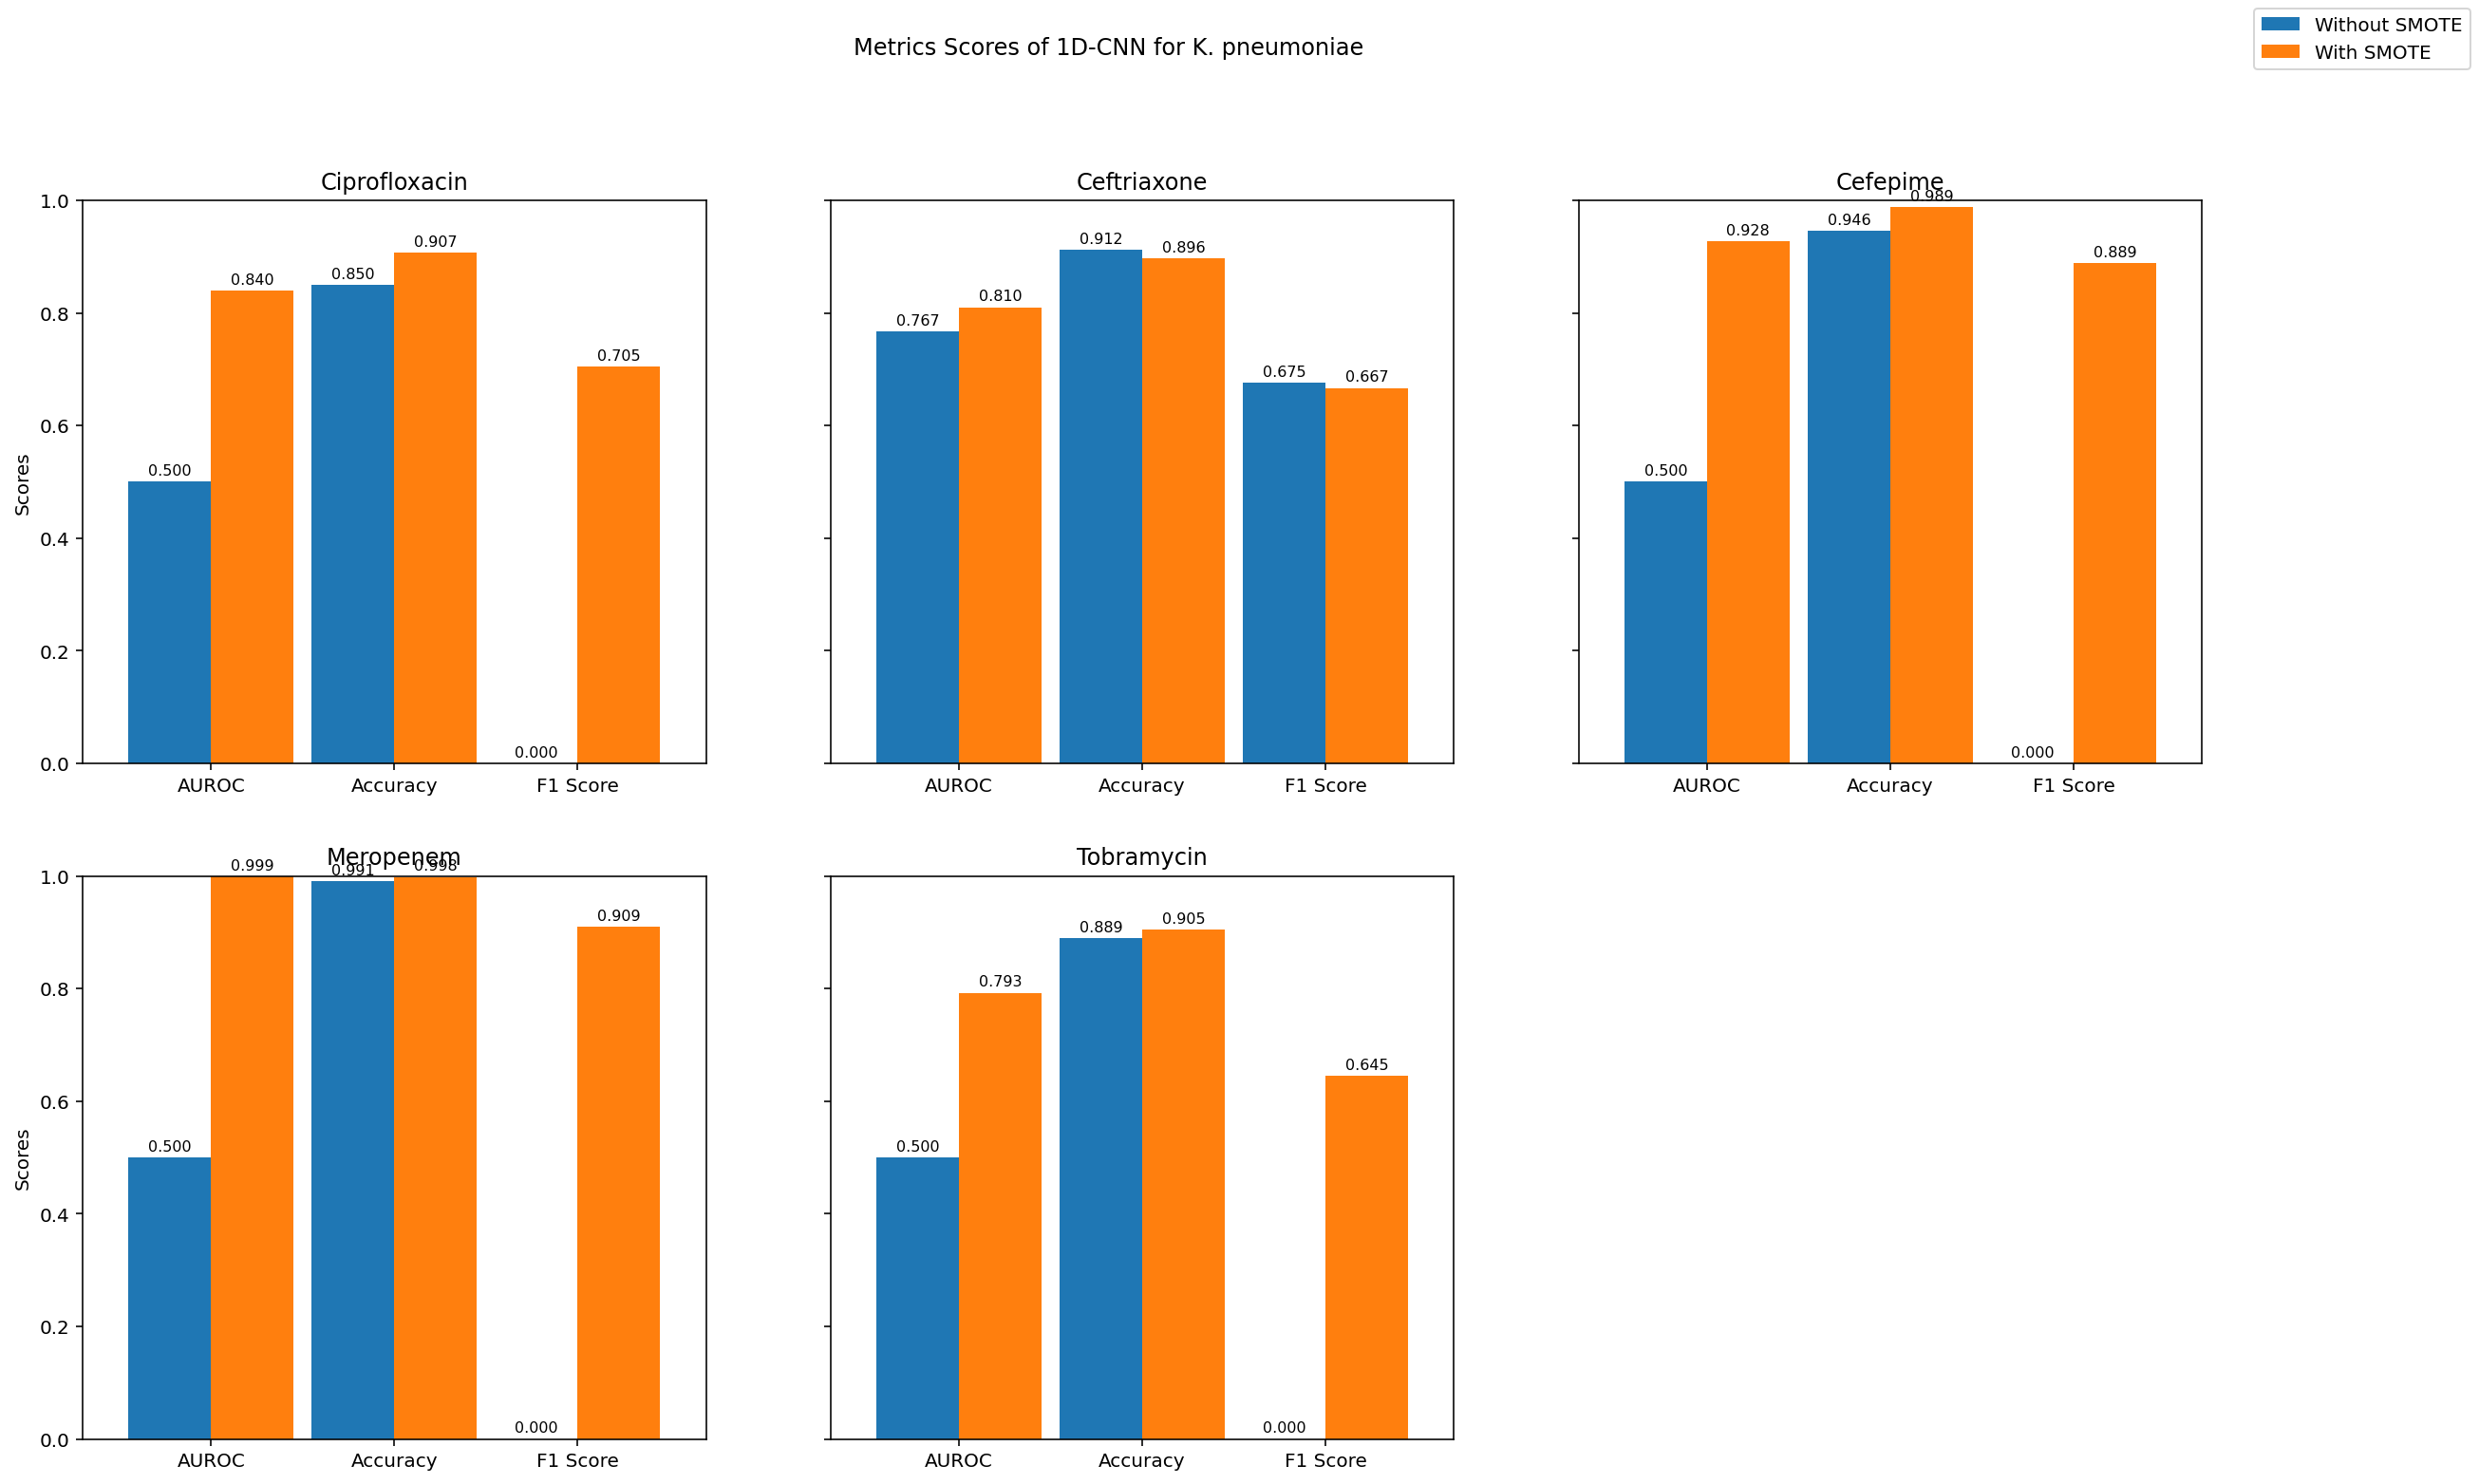

In [53]:
kpn_results.bar_plot(
    title='Metrics Scores of 1D-CNN for K. pneumoniae',
    save_as='./results/1d_cnn/kpn/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (K. pneumoniae)

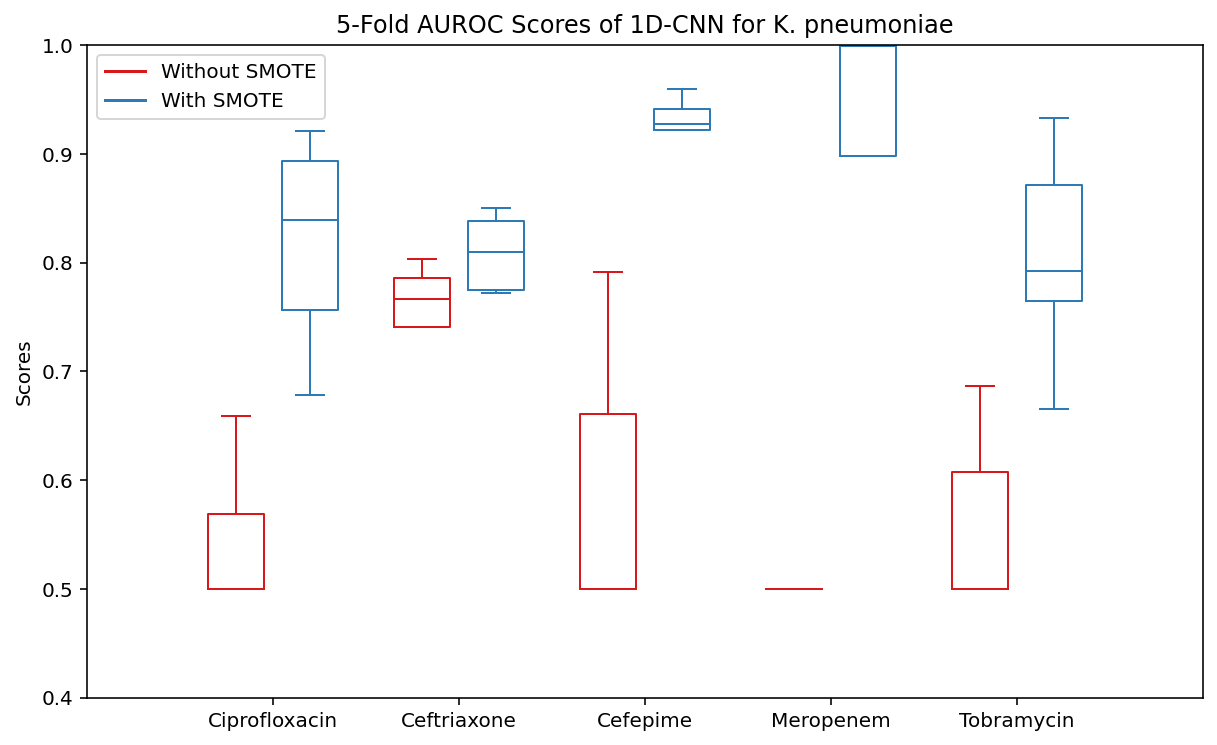

In [54]:
kpn_results.box_plot(
    save_as='./results/1d_cnn/kpn/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for K. pneumoniae',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)

## S. aureus

In [55]:
aureus_trainer = Trainer(
    pathogen='Staphylococcus aureus',
    n_splits=5,
    sites=sites,
    years=years,
)

aureus_drugs = [
    'Ciprofloxacin',
    'Fusidic acid',
    'Oxacillin',
]

for drug in aureus_drugs:
    aureus_trainer.fit(
        drug=drug,
        model=build_cnn_1d(),
        # params for `model.fit()`
        epochs=100,
        validation_split=0.2,
        verbose=0,
        callbacks=cnn_callbacks,
    )

# collect results
aureus_results = aureus_trainer.collect_results()
aureus_results.save_to('./results/1d_cnn/aureus')

Loading Ciprofloxacin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://e8796c78-928f-408d-a021-591383b981b7/assets


INFO:tensorflow:Assets written to: ram://e8796c78-928f-408d-a021-591383b981b7/assets


Fold 1/5...
23/23 [==============================] - 0s 4ms/step
AUC=0.5, ACC=0.8592896174863388, f1=0.0
Fold 2/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.7462896543194608, ACC=0.8987688098495212, f1=0.5978260869565217
Fold 3/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.8087548698287057, ACC=0.9015047879616963, f1=0.6603773584905661
Fold 4/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.79745377527673, ACC=0.896032831737346, f1=0.6415094339622642
Fold 5/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.8375718879475604, ACC=0.9370725034199726, f1=0.7578947368421052
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://5c6f3ffc-8b6b-4848-8d39-0bb2dbfa09ff/assets


INFO:tensorflow:Assets written to: ram://5c6f3ffc-8b6b-4848-8d39-0bb2dbfa09ff/assets


Fold 1/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.7788831092657478, ACC=0.8920765027322405, f1=0.6183574879227053
Fold 2/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.7820944901366644, ACC=0.8905608755129959, f1=0.6190476190476191
Fold 3/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.8683677570960361, ACC=0.9411764705882353, f1=0.7860696517412936
Fold 4/5...
23/23 [==============================] - 0s 3ms/step
AUC=0.9556690990043906, ACC=0.9726402188782489, f1=0.9056603773584906
Fold 5/5...
23/23 [==============================] - 0s 2ms/step
AUC=0.9838445365159854, ACC=0.9931600547195623, f1=0.975609756097561
Loading Fusidic acid...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://8c3d2b47-031d-416f-bc24-4dc3f6f4bd31/assets


INFO:tensorflow:Assets written to: ram://8c3d2b47-031d-416f-bc24-4dc3f6f4bd31/assets


Fold 1/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9323607427055703, f1=0.0
Fold 2/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9322709163346613, f1=0.0
Fold 3/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9322709163346613, f1=0.0
Fold 4/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9335989375830013, f1=0.0
Fold 5/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.5, ACC=0.9335989375830013, f1=0.0
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://67040c93-f254-4abc-801b-67bad0f2b2e0/assets


INFO:tensorflow:Assets written to: ram://67040c93-f254-4abc-801b-67bad0f2b2e0/assets


Fold 1/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.6494435612082672, ACC=0.9058355437665783, f1=0.33644859813084116
Fold 2/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.7688536953242836, ACC=0.8911022576361222, f1=0.4383561643835617
Fold 3/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.716230936819172, ACC=0.9455511288180611, f1=0.5287356321839081
Fold 4/5...
24/24 [==============================] - 0s 3ms/step
AUC=0.897908961593172, ACC=0.9654714475431607, f1=0.7592592592592593
Fold 5/5...
24/24 [==============================] - 0s 3ms/step
AUC=0.9078662873399715, ACC=0.9840637450199203, f1=0.8723404255319149
Loading Oxacillin...
Training w/o SMOTE...


INFO:tensorflow:Assets written to: ram://bbceded5-da77-4049-a898-a372a2500a57/assets


INFO:tensorflow:Assets written to: ram://bbceded5-da77-4049-a898-a372a2500a57/assets


Fold 1/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.7774202621364684, ACC=0.899736147757256, f1=0.6885245901639345
Fold 2/5...
24/24 [==============================] - 0s 3ms/step
AUC=0.82469483039883, ACC=0.920844327176781, f1=0.7637795275590551
Fold 3/5...
24/24 [==============================] - 0s 3ms/step
AUC=0.8270686842549361, ACC=0.9076517150395779, f1=0.7426470588235294
Fold 4/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.8313326208021601, ACC=0.9102902374670184, f1=0.7499999999999999
Fold 5/5...
24/24 [==============================] - 0s 5ms/step
AUC=0.8423986032769272, ACC=0.8970976253298153, f1=0.738255033557047
Training w/ SMOTE...


INFO:tensorflow:Assets written to: ram://861ab968-0d02-4d8b-bcf9-de8bb3464569/assets


INFO:tensorflow:Assets written to: ram://861ab968-0d02-4d8b-bcf9-de8bb3464569/assets


Fold 1/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.8188389492040277, ACC=0.8773087071240105, f1=0.6930693069306931
Fold 2/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.851949147775215, ACC=0.9010554089709762, f1=0.7491638795986623
Fold 3/5...
24/24 [==============================] - 0s 2ms/step
AUC=0.844754458007538, ACC=0.9234828496042217, f1=0.7819548872180452
Fold 4/5...
24/24 [==============================] - 0s 3ms/step
AUC=0.9265117848905889, ACC=0.9577836411609498, f1=0.8881118881118881
Fold 5/5...
24/24 [==============================] - 0s 4ms/step
AUC=0.968517772405766, ACC=0.9828496042216359, f1=0.9550173010380623


### Bar Graph (K. pneumoniae)

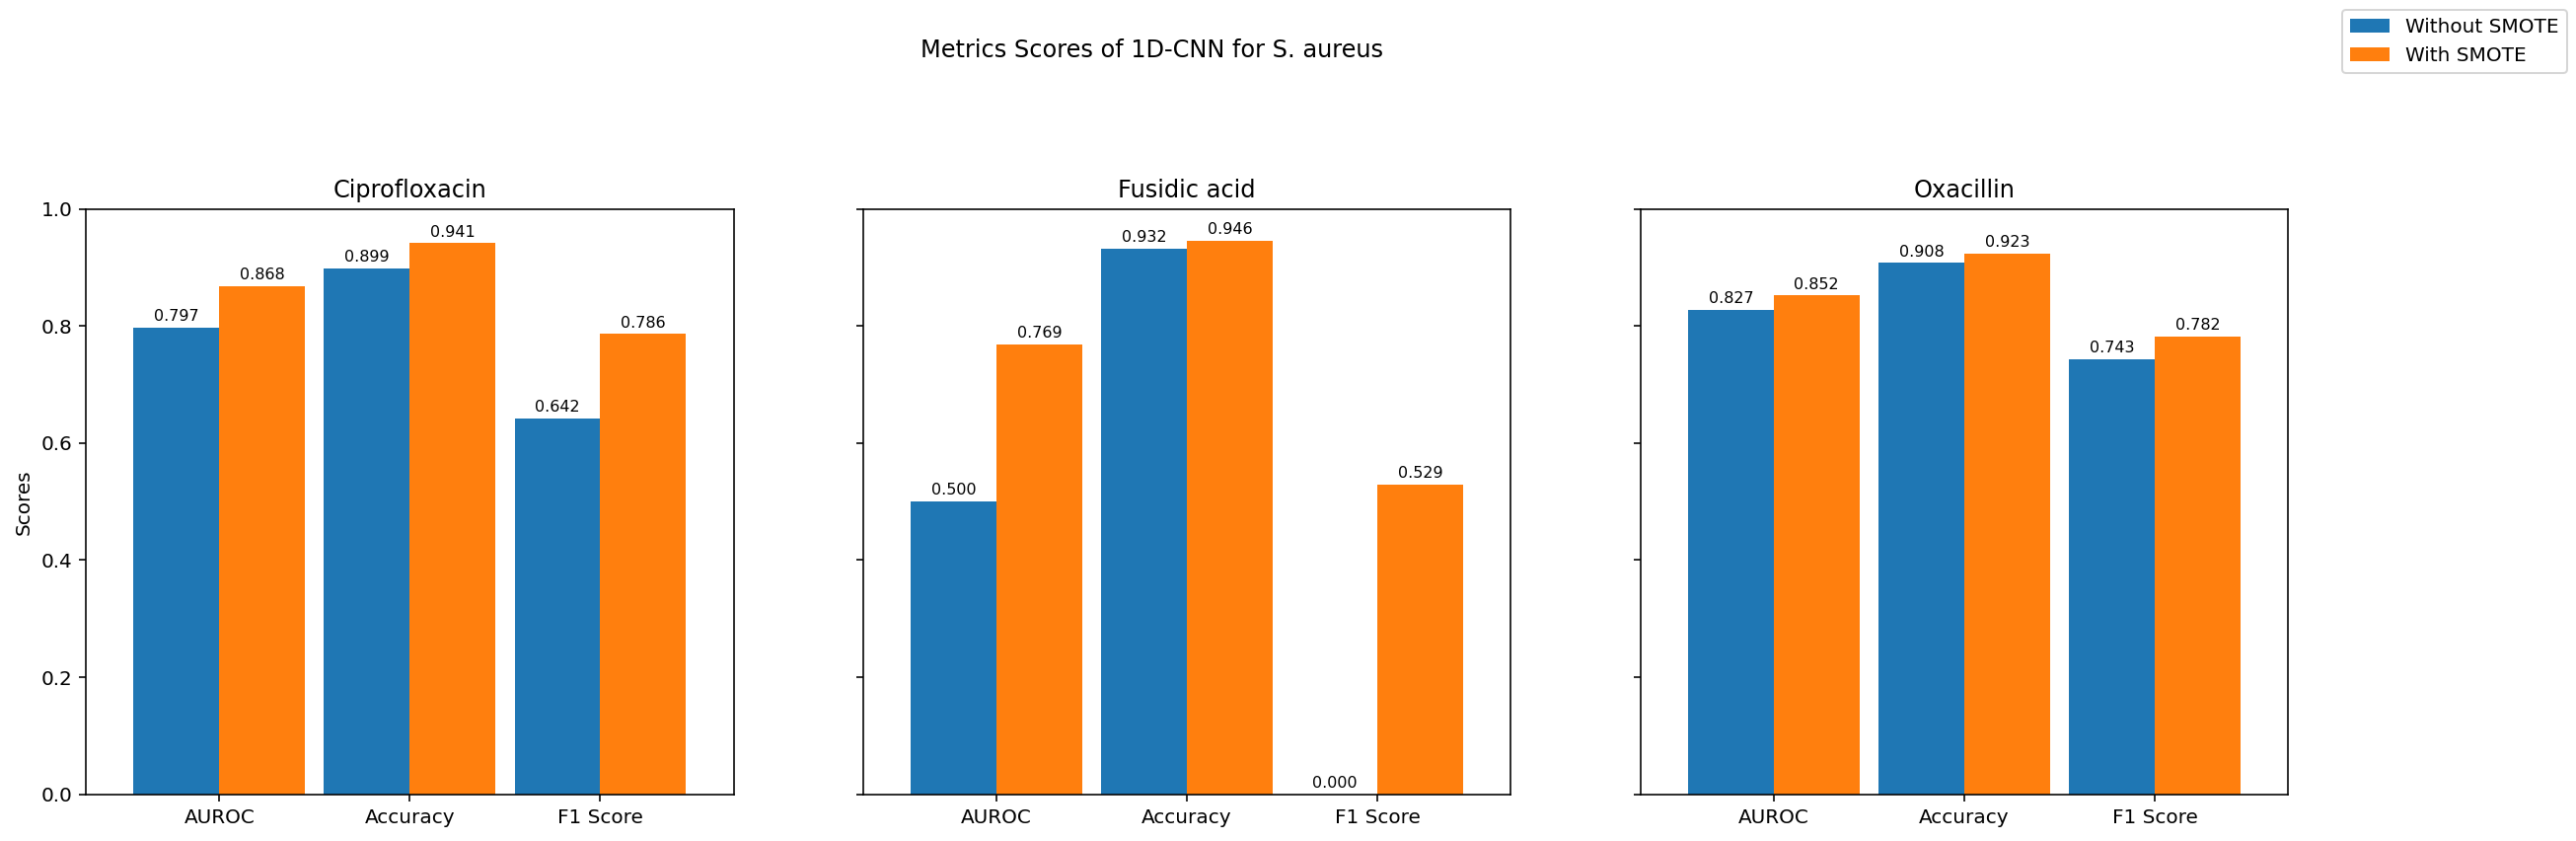

In [56]:
aureus_results.bar_plot(
    title='Metrics Scores of 1D-CNN for S. aureus',
    save_as='./results/1d_cnn/aureus/bar.png',
    nrows=2,
    ncols=3,
    sharey=True,
    figsize=(20, 12),
    y_lim=(0, 1),
)

### Box Graph (K. pneumoniae)

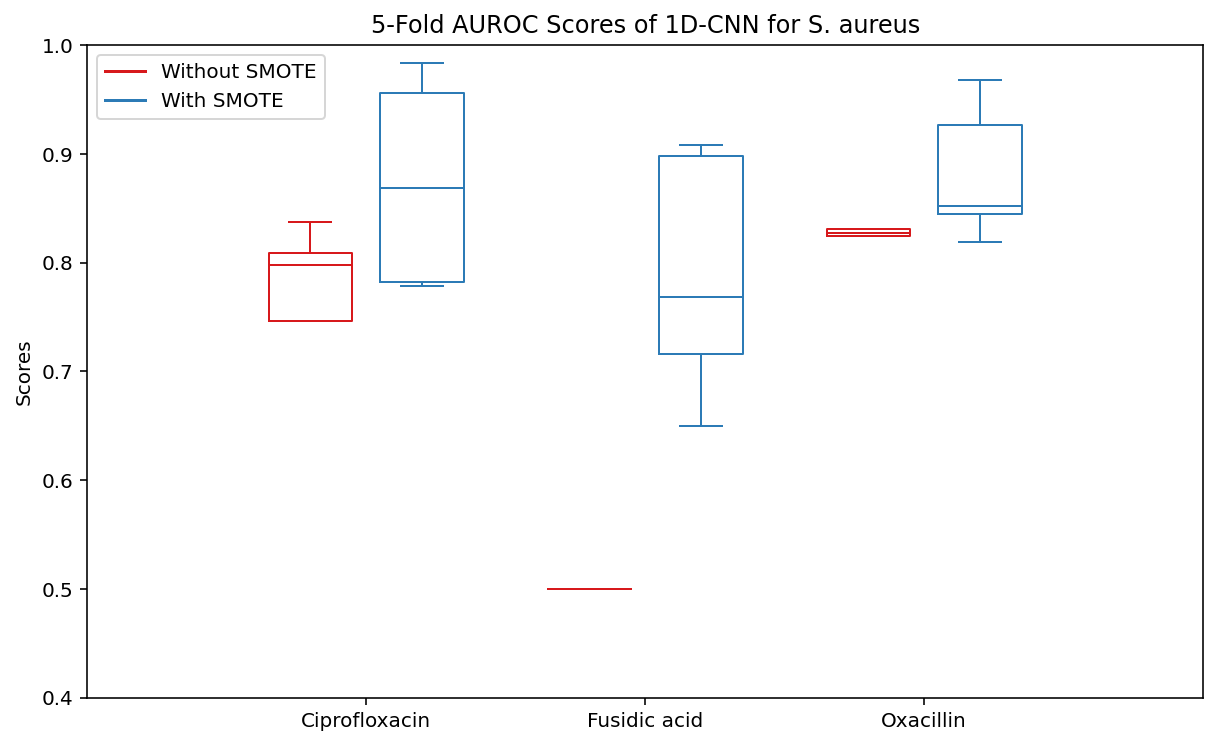

In [57]:
aureus_results.box_plot(
    save_as='./results/1d_cnn/aureus/box.png',
    # format subtitles (`{}` will be replaced with metrics' name)
    subtitle_template='5-Fold {} Scores of 1D-CNN for S. aureus',
    # plot AUROC only
    metrics=['AUROC'],
    # set view limits for y-axis
    y_lim=(0.4, 1.0),
    figsize=(10, 6),
)
